<a href="https://colab.research.google.com/github/sethtroisi/OEIS/blob/master/A037274/HomePrimeStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Look at probability of prime of form \<prefix>\<x digits>\[1379\]

In [0]:
from IPython.display import clear_output

!apt install libgmp-dev libmpfr-dev libmpc-dev
!pip install gmpy2

clear_output()

In [0]:
#@title Parameters { run: "auto" }

SIMULATIONS = 100000 #@param {type:"integer"}
num_digits  = 80 #@param {type:"integer"}



After 100000


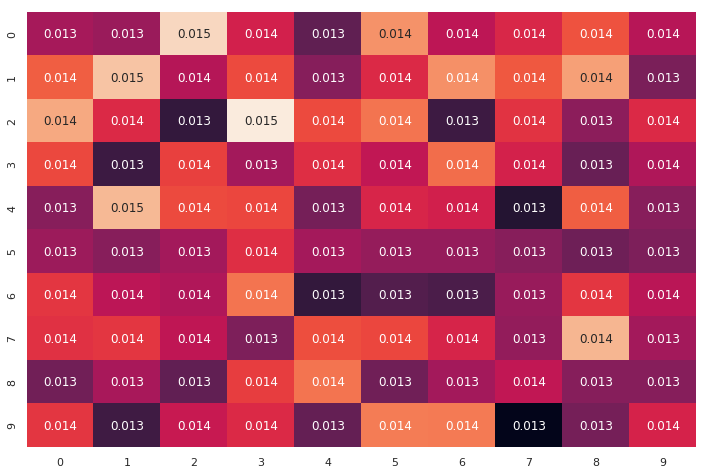


Prime Number Theorum: 0.0135
Avg: 0.0136
Min: 0.0126
Max: 0.0148


In [30]:


import random
import gmpy2
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tqdm


sns.set()

rand = random.Random(49)

base_rate = 1 / math.log(10 ** (num_digits + 0.5))
base_rate *= 2/1 * 5/4 # We filter these

prefixes = list(range(1, 99+1))
counts = [base_rate] + [0 for p in prefixes]

for simulation in range(SIMULATIONS+1):
  middle = random.randint(10 ** (num_digits-4), 10 ** (num_digits-3) - 1)  
  for p in prefixes:
    end = [1,3,7,9][simulation % 4]

    test = str(p) + str(middle) + str(end)
    assert len(test) == num_digits - 1 * (p <= 9)

    if gmpy2.is_prime(int(test)):
      counts[p] += 1

  if simulation and simulation % 1000 == 0:
    ratio = [counts[i] / simulation for i in range(len(counts))]
    ratio[0] = base_rate
    clear_output()

    print ("After", simulation)
    _ = plt.figure(figsize=(12, 8))
    ax = sns.heatmap(np.reshape(ratio, (10, 10)), annot=True, fmt=".3f", cbar=False)
    plt.show()

print ()
print ("Prime Number Theorum: {:.3}".format(ratio[0]))
print ("Avg: {:.3}".format(sum(ratio)/len(ratio)))
print ("Min: {:.3}".format(min(ratio)))
print ("Max: {:.3}".format(max(ratio)))